In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tkinter import *
import os

In [3]:
        ## the code below can take the information in a soup variable
        ## and turn it to an orgenized list!!!
# lis = []
# for tr in soup.findAll("tr" ,bgcolor="#FFFFFF"):
#     values = [td.text for td in tr.findAll("td")]
#     lis.append(values)

# len(lis)

In [4]:
## in this project we are taking cars sales ads from the "komo" website using web-crawling.
## in the site all the sales add are divided into 4 car categories: private, commersial, jeeps and trucks.
## in every sale ad their are the following info about the cars: "price","km driven","year of prudaction" and....
## we know that this isn't alot of data beacause of the lack of some importent features as the car's model
## ,if the car have manual transmission or automatic transmission, but we'll try to make the most out of it.

In [11]:
## our target website haven't got all the sale ads in one url
## so we'll go throgh all of the urls that store the sale ads
## first we'll store them in a list:
links = []
for style in ["private","commercial","jeeps","trucks"]:
    for x in [("https://www.komo.co.il/code/cars/"+style+".asp?currPage="+y+"&subLuachNum=1&collapsed=1") for y in ["1","2","3","4","5","6","7","8","9","10"]]:
        links.append(x)

In [41]:
 ## the following code aproves that we have all the links we need:
# links

In [13]:
        ## now w'll make a list of the soup varables of the
        ## websites!
        ### note that the code below requests information from 40
        ### websites so it might take up to a minate for it to end 
        ### all the requests
soups = []
for x in links:
    page = requests.get(x)
    soup = BeautifulSoup(page.text,"html.parser")
    soups.append(soup)

In [167]:
   ## now we'll use all the soup variables to 
        ## get the data we need!
data = []
for x in soups:
    for tr in (x.findAll("tr" ,bgcolor="#FFFFFF")):
        values = [td.text for td in tr.findAll("td")]
        data.append(values)

In [168]:
        ## the code below approve that we have all the needed data
        ## and the amount of samples matches the value we expected.
        ## that's beacuse we took information from 40 websites 
        ## which on every one of them there are 20 sale ads!
print(len(data))

800


In [169]:
        ## the code below tells us that all the details about the cars
        ## are stored in string varbales so we will change them to 
        ## int type in the foregoing
print(type(data[0][0]))
print(type(data[10][1]))
print(type(data[80][2]))
print(type(data[120][3]))
print(type(data[500][4]))
print(type(data[600][5]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [170]:
        ## now we are turning the data list into a dataframe!
df = pd.DataFrame(data,columns=["car_type","firm","area","km","cost","year of prudaction","time of ad"])
df

,car_type,firm,area,km,cost,year of prudaction,time of ad
0,רכב פרטי,מאזדה - 3,תל אביב,19000,"102,000 ₪",2017,19 ימים
1,רכב פרטי,אלפא רומאו - ג’ולייטה,באר שבע והסביבה,80000,"92,000 ₪",2016,21 דקות
2,רכב פרטי,מאזדה - 5,חיפה וחוף הכרמל,144000,"57,000 ₪",2012,1 ימים
3,רכב פרטי,פיג’ו - 207,עמק יזרעאל,129000,"15,000 ₪",2010,1 שעות
4,רכב פרטי,אאודי - A7,ירושלים והסביבה,61400,"238,000 ₪",2019,1 שעות
...,...,...,...,...,...,...,...
795,משאיות,דאף - 45.180,כרמיאל והסביבה,560000,"68,000 ₪",2008,3 ימים
796,משאיות,איסוזו - NPR75,אשדוד - אשקלון,17000,לא צויין,2020,2 ימים
797,משאיות,איווקו - 440S,מושבים בשרון,450000,"190,000 ₪",2015,2 ימים
798,משאיות,דאף -,ירושלים והסביבה,2222,"53,000 ₪",2006,2 ימים


In [171]:
        ## cheking if the data have resonable values:
print("car types:",df.car_type.unique(),'\n')
print(df.car_type.value_counts(),'\n')
print("different costs of *cars*(all types):",len(df.cost.unique()),'\n')
print("different costs of *privates*:",len(df[df.car_type == "רכב פרטי"].cost.unique()),'\n')
print("different costs of *comercial*:",len(df[df.car_type == "רכב מסחרי"].cost.unique()),'\n')
print("different cost of *jeeps*:",len(df[df.car_type == "ג'יפים"].cost.unique()),'\n')
print("different cost of *trucks*:",len(df[df.car_type == "משאיות"].cost.unique()))
    ## in the code below we can see that
    ## the amount of unique cost seems resonable - there isn't too much repetition,
    ## so the data looks fine.

car types: ['רכב פרטי' 'רכב מסחרי' "ג'יפים" 'משאיות'] 

רכב פרטי     200
רכב מסחרי    200
ג'יפים       200
משאיות       200
Name: car_type, dtype: int64 

different costs of *cars*(all types): 229 

different costs of *privates*: 112 

different costs of *comercial*: 95 

different cost of *jeeps*: 126 

different cost of *trucks*: 56


In [172]:
        ## נשים לב שישנם יותר מדי איזורים שונים - לכן ננסה לחלק אותם ל 3 איזורים מרכזיים - דרום,מרכז וצפון

In [173]:
        ## i wanted to use the car firm as a feature
        ## but we can see in the code below that the
        ## name given to each car in the website 
        ## is the firm of the car and the model of the
        ## car - and that's without a pattern (sometimes
        ## the firm name is first and sometimes the model name
        ## is first),hence it would be a painstaking work to
        ## categorize all the cars to their firms as a feature.
        ## so we'll drop this column.
print(len(df.firm.unique()))
df.firm.unique()

375


array(['מאזדה - 3', 'אלפא רומאו - ג’ולייטה', 'מאזדה - 5', 'פיג’ו - 207',
       'אאודי - A7', 'יונדאי - i30', 'פיג’ו - 208', 'סוזוקי - ספלאש',
       'קיה - סיד', 'סוזוקי - בלנו', 'פיאט - 500X', 'פולקסווגן - גולף',
       'סיאט - איביזה', 'קיה - פיקנטו', 'סיטרואן - C4 קקטוס',
       'טויוטה - יאריס', 'רנו - קליאו', 'יונדאי - i35', 'אאודי - A1',
       'סוזוקי - איגניס', 'מרצדס - E-CLASS', 'שברולט - אורלנדו',
       'שברולט - אקווינוקס', 'סובארו - XV', 'שברולט - טראקס',
       'יונדאי - איוניק', 'יונדאי - אלנטרה', 'אופל - אסטרה',
       'פיג’ו - 206', 'טויוטה - אוריס', 'מיני - ONE', 'מיני - JCW',
       'מרצדס - A-CLASS', 'טויוטה - קורולה', 'פורד - S-מקס',
       'סוזוקי - סוויפט', 'יונדאי - i10', 'רנו - קנגו', 'יונדאי - i20',
       'קיה - סול', 'מאזדה - 2', 'פיאט - 500', 'סוזוקי - אלטו',
       'סקודה - אוקטביה', 'ניסאן - אלטימה', 'פורד - פיאסטה',
       'רנו - גרנד קופה', 'דייהו - נובירה', 'הונדה - סיוויק האצ’בק החדשה',
       'סקודה - פאביה', 'מרצדס - C-CLASS', 'יונדאי - i30cw',
   

In [174]:
        ## according to the explnation in the above cell - we won't use the "firm" column as 
        ## a feature.
        ## and the "time of add" column is redundent (this column notes the time the ad was on the 
        ## website)
        ## so we'll drop those two.
df = df.drop(["firm","time of ad"],axis=1)
df

,car_type,area,km,cost,year of prudaction
0,רכב פרטי,תל אביב,19000,"102,000 ₪",2017
1,רכב פרטי,באר שבע והסביבה,80000,"92,000 ₪",2016
2,רכב פרטי,חיפה וחוף הכרמל,144000,"57,000 ₪",2012
3,רכב פרטי,עמק יזרעאל,129000,"15,000 ₪",2010
4,רכב פרטי,ירושלים והסביבה,61400,"238,000 ₪",2019
...,...,...,...,...,...
795,משאיות,כרמיאל והסביבה,560000,"68,000 ₪",2008
796,משאיות,אשדוד - אשקלון,17000,לא צויין,2020
797,משאיות,מושבים בשרון,450000,"190,000 ₪",2015
798,משאיות,ירושלים והסביבה,2222,"53,000 ₪",2006


In [175]:
        ## we'll make sure there isn't null values:
df.isnull().sum()

car_type              0
area                  0
km                    0
cost                  0
year of prudaction    0
dtype: int64

In [176]:
        ## there is no null values but yet not all of the "cost" values
        ## are numbers that's beacause some sellers didn't mention the
        ## price of the vechile.
        ## now we'll delete the rows where the sale ad didn't 
        ## had a price
df = df[df.cost != "לא צויין"]
df

,car_type,area,km,cost,year of prudaction
0,רכב פרטי,תל אביב,19000,"102,000 ₪",2017
1,רכב פרטי,באר שבע והסביבה,80000,"92,000 ₪",2016
2,רכב פרטי,חיפה וחוף הכרמל,144000,"57,000 ₪",2012
3,רכב פרטי,עמק יזרעאל,129000,"15,000 ₪",2010
4,רכב פרטי,ירושלים והסביבה,61400,"238,000 ₪",2019
...,...,...,...,...,...
792,משאיות,חיפה וחוף הכרמל,520000,"85,000 ₪",2015
793,משאיות,רעננה - כפר סבא,430000,"70,000 ₪",2008
795,משאיות,כרמיאל והסביבה,560000,"68,000 ₪",2008
797,משאיות,מושבים בשרון,450000,"190,000 ₪",2015


In [177]:
        ## now we'll make a function that can turn
        ## "cost" column (which are of type string)
        ## to an int type
to_cost = lambda x:int(x[0:-2].replace(",",""))
to_int = lambda x : int(x)
df.cost = df.cost.apply(to_cost)
df.km = df.km.apply(to_int)
df["year of prudaction"] = df["year of prudaction"].apply(to_int) 

C:\Users\noams\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\noams\AppData\Local\Temp/ipykernel_21588/3311022266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year of prudaction"] = df["year of prudaction"].apply(to_int)


In [178]:
        ## cheking if the type of the columns "km","cost" and "year of prudaction" have changed to int:
print(type(df.km[0]))
print(type(df.cost[0]))
print(type(df["year of prudaction"][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [179]:
        ## note that the "car_type" column is a string column that have
        ## 4 possible values: "רכב פרטי","רכב מסחרי","גיפים","משאיות"
        ## we can't use this column as a feature just yet beacuase it's
        ## a string, we could decide that רכב פרטי=1, רכב מסחרי=2, גיפים=3, but if
        ## we'll do so we'll create a bias for the model that "רכב פרטי" is somehow more "closer"
        ## to "רכב מסחרי" from "גיפים", which we don't want so we'll use dummy variables insted:
type_dummies = pd.get_dummies(df.car_type).iloc[:,1:]
df = pd.concat([df,type_dummies], axis = 1)
df

,car_type,area,km,cost,year of prudaction,משאיות,רכב מסחרי,רכב פרטי
0,רכב פרטי,תל אביב,19000,102000,2017,0,0,1
1,רכב פרטי,באר שבע והסביבה,80000,92000,2016,0,0,1
2,רכב פרטי,חיפה וחוף הכרמל,144000,57000,2012,0,0,1
3,רכב פרטי,עמק יזרעאל,129000,15000,2010,0,0,1
4,רכב פרטי,ירושלים והסביבה,61400,238000,2019,0,0,1
...,...,...,...,...,...,...,...,...
792,משאיות,חיפה וחוף הכרמל,520000,85000,2015,1,0,0
793,משאיות,רעננה - כפר סבא,430000,70000,2008,1,0,0
795,משאיות,כרמיאל והסביבה,560000,68000,2008,1,0,0
797,משאיות,מושבים בשרון,450000,190000,2015,1,0,0


In [180]:
        ## we'll rename the variables to english
        ## and drop the "car_type" column since
        ## we don't need it anymore
df = df.rename(columns={"רכב פרטי":"private","רכב מסחרי":"commercial","משאיות":"tracks"})
df = df.drop(columns={"car_type"})
df

,area,km,cost,year of prudaction,tracks,commercial,private
0,תל אביב,19000,102000,2017,0,0,1
1,באר שבע והסביבה,80000,92000,2016,0,0,1
2,חיפה וחוף הכרמל,144000,57000,2012,0,0,1
3,עמק יזרעאל,129000,15000,2010,0,0,1
4,ירושלים והסביבה,61400,238000,2019,0,0,1
...,...,...,...,...,...,...,...
792,חיפה וחוף הכרמל,520000,85000,2015,1,0,0
793,רעננה - כפר סבא,430000,70000,2008,1,0,0
795,כרמיאל והסביבה,560000,68000,2008,1,0,0
797,מושבים בשרון,450000,190000,2015,1,0,0


In [181]:
    ## right now we can't use the "area" column as a feature beacause it's of type string.
    ## lets see if we divide this column into dummy variables:
df.area.unique()

array(['תל אביב', 'באר שבע והסביבה', 'חיפה וחוף הכרמל', 'עמק יזרעאל',
       'ירושלים והסביבה', 'עכו - נהריה', 'נתניה והסביבה', 'רמלה - לוד',
       'מושבים בשרון', 'מודיעין והסביבה', 'חולון - בת ים',
       'כרמיאל והסביבה', 'רמת השרון - הרצליה', 'בקעת אונו',
       'פתח תקוה והסביבה', 'נס ציונה - רחובות', 'מושבים בצפון',
       'מושבים בשפלה', 'רמת גן - גבעתיים', 'ראשל"צ והסביבה',
       'בית שמש והסביבה', 'אשדוד - אשקלון', 'גדרה יבנה והסביבה',
       'רעננה - כפר סבא', 'קריות', 'הוד השרון והסביבה', 'גליל ועמקים',
       'קיסריה והסביבה', 'טבריה והסביבה', 'יישובי השומרון',
       'זכרון - בנימינה', 'חדרה וישובי עמק חפר', 'מושבים בדרום',
       'אילת והערבה', 'אזור צפון', 'מושבים במרכז'], dtype=object)

In [182]:
#     we can see in the cell bellow that there is too much diffrent values in "area" column
#     so we can't divie it to dummiy variables
#     but we'll walk throgh the options manually and make a function that will create a new
#     column which divieds the values in "area" to "north","south","center","jerosalem"
def to_area(area):
    if(area in ['תל אביב','נס ציונה - רחובות',
                'ראשל"צ והסביבה','רמת השרון - הרצליה','חולון - בת ים','פתח תקוה והסביבה',
               'מושבים בשרון','רמת גן - גבעתיים','רמלה - לוד','נתניה והסביבה',
                'רעננה - כפר סבא','הוד השרון והסביבה','בקעת אונו','מושבים במרכז',
               'גדרה יבנה והסביבה']):
        return "center"
    if(area in ['חיפה וחוף הכרמל','טבריה והסביבה','עכו - נהריה','מושבים בצפון',
               'קריות','עמק יזרעאל','גליל ועמקים','חדרה וישובי עמק חפר','זכרון - בנימינה',
               'אזור צפון','כרמיאל והסביבה']):
        return "north"
    if(area in ['ירושלים והסביבה','בית שמש והסביבה',"קיסריה והסביבה",'מושבים בשפלה']):
        return "jerusalem"
    if(area in ['באר שבע והסביבה','אשדוד - אשקלון','מודיעין והסביבה','מושבים בדרום']):
        return "south"
    else: 
        return -1

In [183]:
    ## note that even though "יישובי השומרון" and "אילת והערבה" are values in "area" we didn't mentioned
    ## them in the to_area function, that's beacause they don't fall to any of the four neat categories
    ## "north","south","center","jerosalem", and each of them has small amount of samples, so to generelize
    ## we will get rid of them, and then apply the to_area function
df = df[df["area"]!= "יישובי השומרון"]
df = df[df["area"]!= "אילת והערבה"]
df["area"] = df["area"].apply(to_area)

In [184]:
    ## we'll check that all of the former values in "area" have been change to one of the values:
    ## "north","south","center","jerosalem":
len(df[(df["area"] != "center") &
   (df["area"] != "north") &
   (df["area"] != "south") &
   (df["area"] != "jerusalem")])

0

In [185]:
        ## now we'll make dummiy variables for the "area" column
type_dummies = pd.get_dummies(df.area).iloc[:,1:]
df = pd.concat([df,type_dummies], axis = 1)
df

,area,km,cost,year of prudaction,tracks,commercial,private,jerusalem,north,south
0,center,19000,102000,2017,0,0,1,0,0,0
1,south,80000,92000,2016,0,0,1,0,0,1
2,north,144000,57000,2012,0,0,1,0,1,0
3,north,129000,15000,2010,0,0,1,0,1,0
4,jerusalem,61400,238000,2019,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
792,north,520000,85000,2015,1,0,0,0,1,0
793,center,430000,70000,2008,1,0,0,0,0,0
795,north,560000,68000,2008,1,0,0,0,1,0
797,center,450000,190000,2015,1,0,0,0,0,0


In [186]:
    ## we'll make a duplicate of the column "area" (for reasons that will be explained in the foregoing)
    ## and delete the "area" column in df
copy_df = df["area"]
df.drop(columns="area",inplace=True)

In [187]:
        ## we'll rearange the the data frame so that cost will be the first column:
df = df[["cost","km","year of prudaction","tracks","commercial","private","jerusalem","north","south"]]
df

,cost,km,year of prudaction,tracks,commercial,private,jerusalem,north,south
0,102000,19000,2017,0,0,1,0,0,0
1,92000,80000,2016,0,0,1,0,0,1
2,57000,144000,2012,0,0,1,0,1,0
3,15000,129000,2010,0,0,1,0,1,0
4,238000,61400,2019,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
792,85000,520000,2015,1,0,0,0,1,0
793,70000,430000,2008,1,0,0,0,0,0
795,68000,560000,2008,1,0,0,0,1,0
797,190000,450000,2015,1,0,0,0,0,0


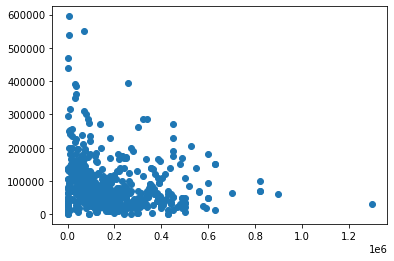

In [188]:
        ## now lets see the connection beatween the features and the target:
import matplotlib.pyplot as plt
plt.plot(df["km"],df.cost,"o")

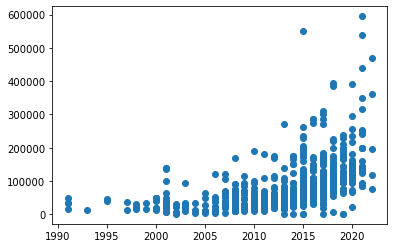

In [189]:
plt.plot(df["year of prudaction"],df.cost,"o")

In [190]:
    ## it's seems that the relation between the "year of prudacion" and the "cost" is roghtlly of second power,
    ## same goes for the relation between "km" and "cost"(but less so)
    ## so polynomial regrretion with 2 power should bring good results.

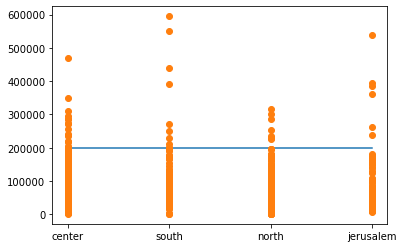

In [199]:
    ## now let's check if the new feature we added "area" can help the model preform better:
line = copy_df.apply(lambda x : 200000)
plt.plot(copy_df,line)
plt.plot(copy_df,df.cost,"o")

In [198]:
    ## we can see in the table above that there is a little diffrence between the different areas
    ## mainly that "jerusalem" have less pricey cars (ussely lower then 200,00)
    ## so it's seems that the "area" feature could help, let's try this out:

In [207]:
    ## importing sklearn for model trainig:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [208]:
    ## spliting to test and train:
X = df.iloc[:,1:len(df.columns)]
y = df.iloc[:,0]

In [209]:
                 ## finding the best polynomial regression:
                 ## takes up to 20 seconds
        ## aid func "minimum":
def minimum(grades):
    m = grades[0]
    for lis in grades:
        if(lis[0]<m[0]):
            m = lis
    return m
#################################

grades = []
for n in range(1,10):
    for bias in [True,False]:
        for interaction in [True,False]:
            for intercept in [True,False]:
                pre_process = PolynomialFeatures(degree=n,include_bias=bias,interaction_only=interaction)
                X_poly = pre_process.fit_transform(X)
                linreg = LinearRegression(fit_intercept=intercept)
                scores = cross_val_score(linreg,X_poly,y,cv=10,scoring="neg_mean_squared_error")
                grades.append([int((-scores.mean())**0.5),n,bias,interaction,intercept])
minimum(grades)

[62234, 1, True, True, True]

In [212]:
grades

[[62234, 1, True, True, True],
 [62234, 1, True, True, False],
 [62234, 1, True, False, True],
 [62234, 1, True, False, False],
 [62234, 1, False, True, True],
 [69788, 1, False, True, False],
 [62234, 1, False, False, True],
 [69788, 1, False, False, False],
 [65821, 2, True, True, True],
 [65821, 2, True, True, False],
 [67854, 2, True, False, True],
 [65991, 2, True, False, False],
 [65821, 2, False, True, True],
 [68134, 2, False, True, False],
 [62398, 2, False, False, True],
 [66143, 2, False, False, False],
 [70545, 3, True, True, True],
 [70896, 3, True, True, False],
 [204003, 3, True, False, True],
 [89508, 3, True, False, False],
 [70876, 3, False, True, True],
 [72545, 3, False, True, False],
 [94477, 3, False, False, True],
 [108658, 3, False, False, False],
 [260704, 4, True, True, True],
 [87835, 4, True, True, False],
 [123573, 4, True, False, True],
 [433215, 4, True, False, False],
 [77191, 4, False, True, True],
 [75508, 4, False, True, False],
 [863288, 4, False, Fa

In [213]:
df = df.drop(columns={"jerusalem","north","south"})
X = df.iloc[:,1:len(df.columns)]
y = df.iloc[:,0]

In [216]:
## finding the best polynomial regression:
## takes up to 20 seconds
## aid func "minimum":
def minimum(grades):
    m = grades[0]
    for lis in grades:
        if(lis[0]<m[0]):
            m = lis
    return m
#################################

grades = []
for n in range(1,10):
    for bias in [True,False]:
        for interaction in [True,False]:
            for intercept in [True,False]:
                pre_process = PolynomialFeatures(degree=n,include_bias=bias,interaction_only=interaction)
                X_poly = pre_process.fit_transform(X)
                linreg = LinearRegression(fit_intercept=intercept)
                scores = cross_val_score(linreg,X_poly,y,cv=10,scoring="neg_mean_squared_error")
                grades.append([int((-scores.mean())**0.5),n,bias,interaction,intercept])
minimum(grades)

[60438, 3, True, False, True]

In [217]:
y_pred_z = [[df.cost.mean()] for x in range(len(df))]
print("*zero model* rmse: ",(mean_squared_error(y,y_pred_z)**0.5))

*zero model* rmse:  76226.91957557475


In [331]:
y = nn_df.loc[:,["cost"]]
y.head(2)

,cost
0,6800
1,102000


In [332]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [333]:
print(len(y_test))
print(len(y_train))

157
468


In [334]:
nn_df.describe()

,km,cost,year of prudaction,tracks,commercial,private
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.00000
mean,193844.099200,84287.857600,2012.412800,0.192000,0.251200,0.27840
std,157906.468773,76210.776127,6.166688,0.394189,0.434051,0.44857
min,1.000000,1000.000000,1986.000000,0.000000,0.000000,0.00000
25%,78000.000000,30000.000000,2009.000000,0.000000,0.000000,0.00000
50%,157000.000000,65000.000000,2014.000000,0.000000,0.000000,0.00000
75%,272000.000000,111000.000000,2017.000000,0.000000,1.000000,1.00000
max,1000000.000000,595000.000000,2022.000000,1.000000,1.000000,1.00000


In [335]:
X

,km,year of prudaction,tracks,commercial,private
0,103000,2003,0,0,1
1,19000,2017,0,0,1
2,23000,2020,0,0,1
3,46000,2001,0,0,1
4,36000,2017,0,0,1
...,...,...,...,...,...
795,280000,2014,1,0,0
796,255000,2008,1,0,0
797,285000,2007,1,0,0
798,441166,2002,1,0,0


In [318]:
nn_df.iloc[0,:]

km                    103000
cost                    6800
year of prudaction      2003
tracks                     0
commercial                 0
private                    1
Name: 0, dtype: int64

In [319]:
linreg = LinearRegression(normalize=False,fit_intercept=True,positive=False)

In [320]:
linreg.fit(X_train,y_train)

LinearRegression()

In [321]:
linreg.predict([[103000,2003,0,0,1]])

array([[-1142.3910124]])

In [322]:
y_pred = linreg.predict(X_test)

In [323]:
mean_squared_error(y_test,y_pred)

3120784726.2665486

In [324]:
(mean_squared_error(y_test,y_pred))**0.5

55863.98416033848

In [325]:
(mean_squared_error(y_train,linreg.predict(X_train)))**0.5

61963.470595632454

In [326]:
linreg.coef_

array([[-6.48959578e-02,  5.88802948e+03,  2.13885533e+04,
        -3.07201849e+04, -4.83220615e+04]])

In [337]:
y_pred = pd.DataFrame([[]])
y_pred

,0
0,0


In [349]:
(mean_squared_error(y,y_pred))**0.5

76149.78309863084